In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:\\Users\\mendo\\OneDrive - UGent\\Documentos\\PhD\\Pedophysics_code') 
sys.path.insert(0, 'C:\\Users\\gmendoza\\OneDrive - UGent\\Documentos\\PhD\\Pedophysics_code')
import numpy as np
from pedophysics.simulate import Soil
from pedophysics import predict
from pedophysics.predict import *
from pedophysics.pedophysical_models.bulk_ec import Fu, Rhoades, LongmireSmithEC
from pedophysics.pedophysical_models.bulk_perm import Hilhorst
#from pedophysics.pedophysical_models.water_perm import MalmbergMaryott, Olhoeft
from pedophysics.pedophysical_models.water import *
from pedophysics.pedotransfer_functions.particle_density import *

import pandas as pd
pd.set_option('max_colwidth', None)


## Figure 3 and 4

In [2]:

sample1 = Soil(water = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
               bulk_density = 1.5)

sample1.water
sample1.bulk_density
sample1.water_ec
sample1.df

,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,NaN,0.10,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.15,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.20,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.25,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.30,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.40,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Figure 10

[0.008947 0.017171 0.027894 0.041118 0.056841 0.095789]
0    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.bulk_ec.non_fitting
Name: bulk_ec, dtype: object


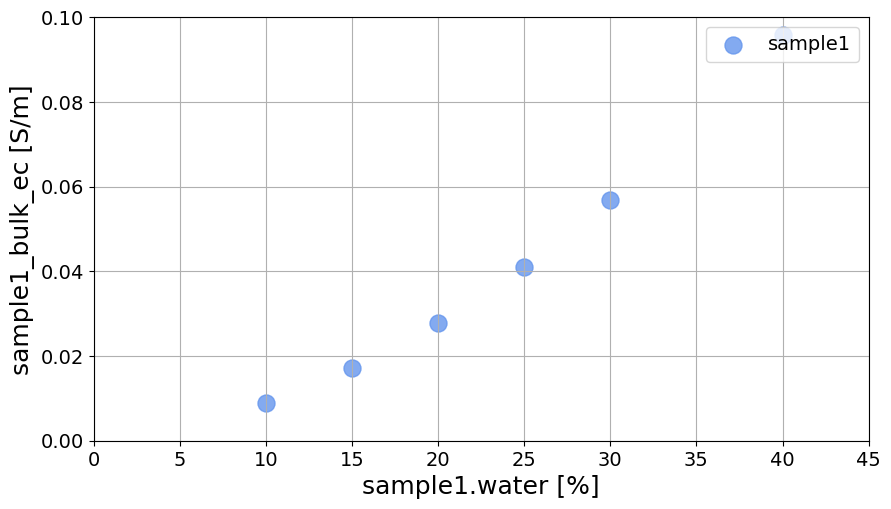

In [34]:

sample1 = Soil(water = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
                bulk_density = 1.5,
                clay = 10,
                water_ec = 0.5)

sample1_bulk_ec = predict.BulkEC(sample1)
print(sample1_bulk_ec)
print(sample1.info.bulk_ec)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)
ss = 150

ax.scatter(sample1.water*100, sample1_bulk_ec, color='cornflowerblue', alpha=0.8, s=ss, label = "sample1")

ax.set_ylim(0, 0.1)
ax.set_xlim(0, 45)
ax.set_ylabel('sample1_bulk_ec [S/m]', fontsize = 18)
ax.set_xlabel('sample1.water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True)  
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex1')
plt.show()

[0.105 0.162 0.185   nan 0.206 0.243]
0    Values given by the user
1    Values given by the user
2    Values given by the user
3                         NaN
4    Values given by the user
5    Values given by the user
Name: bulk_ec, dtype: object
0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
Name: water, dtype: object


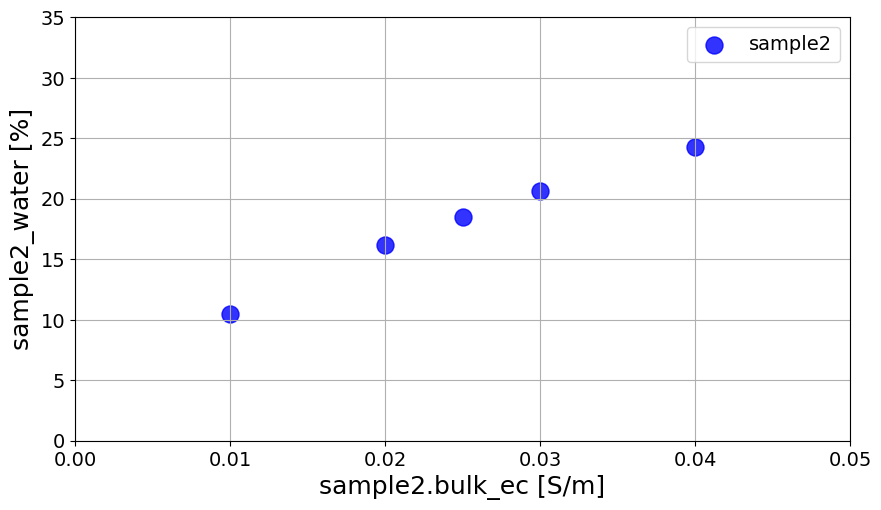

nan

In [28]:
sample2 = Soil( bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = 10,
                bulk_density = 1.4,
                water_ec = 0.5)

sample2_water = predict.Water(sample2) 
print(sample2_water)
print(sample2.info.bulk_ec)
print(sample2.info.water)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)
ax.scatter(sample2.bulk_ec, sample2_water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('sample2.bulk_ec [S/m]', fontsize = 18)
ax.set_ylabel('sample2_water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Ex2')
plt.show()
sample2.df.bulk_ec[3] 

[0.102 0.168 0.179   nan 0.19  0.253]
0    Values given by the user
1    Values given by the user
2    Values given by the user
3                         NaN
4    Values given by the user
5    Values given by the user
Name: bulk_ec, dtype: object
0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting
Name: water, dtype: object


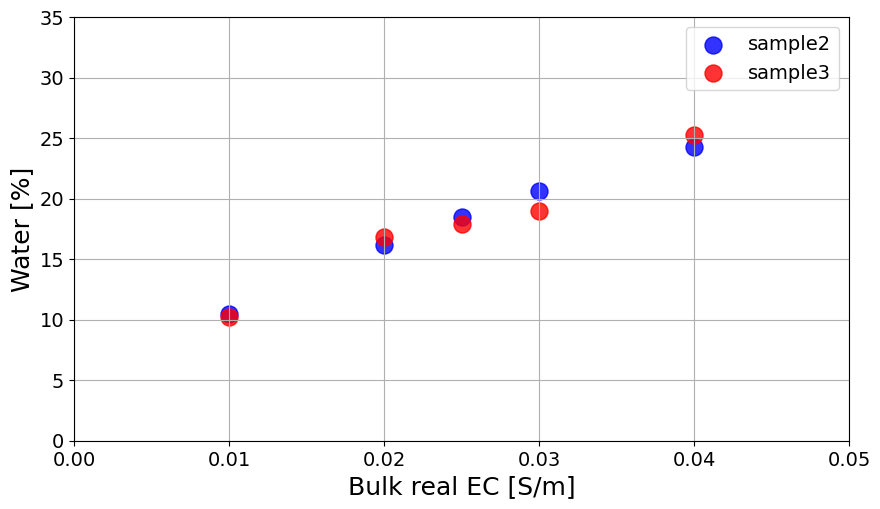

In [27]:
ss = 150
sample3 = Soil( bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = [11, 8, 12, 10, 15, 7],
                bulk_density = 1.4,
                water_ec = 0.5)

sample3_water = predict.Water(sample3) 
print(sample3_water)
print(sample3.info.bulk_ec)
print(sample3.info.water)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)

ax.scatter(sample2.bulk_ec, sample2.df.water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.scatter(sample3.bulk_ec, sample3.df.water*100, color='red', alpha=0.8, s=ss, label = "sample3")

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('Bulk real EC [S/m]', fontsize = 18)
ax.set_ylabel('Water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True)  
ax.legend(loc='upper right', fontsize = 14)


plt.savefig('Ex3')
plt.show()

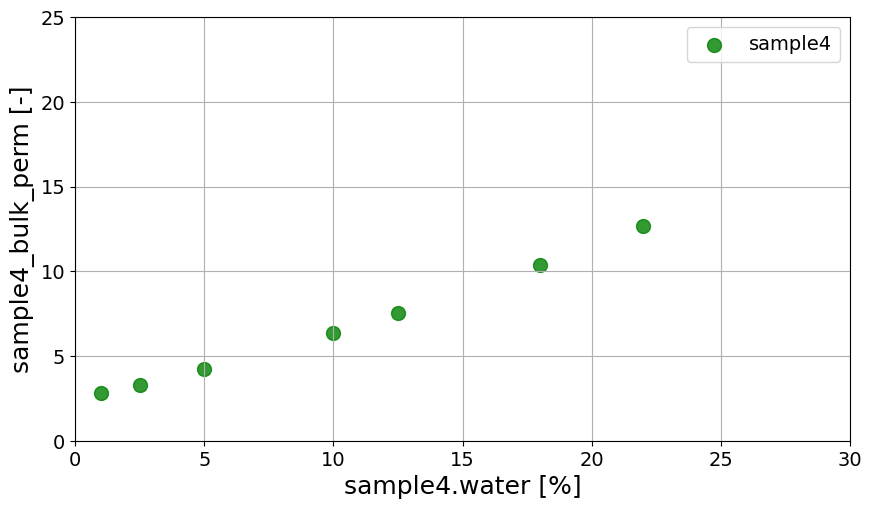

In [38]:
sample4 = Soil( water = [0.01, 0.1, 0.125, 0.025, 0.05, 0.18, 0.22],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

sample4_bulk_perm = predict.BulkPerm(sample4) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(10)
ss=100
ax.scatter(sample4.water*100, sample4_bulk_perm, color='green', alpha=0.8, s=ss, label = "sample4")
ax.set_xlim(0, 30)
ax.set_ylim(0, 25)
ax.set_xlabel('sample4.water [%]', fontsize = 18)
ax.set_ylabel('sample4_bulk_perm [-]', fontsize = 18)
ax.grid(True)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)


plt.savefig('Ex4')
plt.show()

In [ ]:
sample2b = Soil(water = [0.17, 0.03, 0.07, 0.01, 0.1, 
                         0.125, 0.025, 0.05, 0.18, 0.22],
                bulk_perm = [12, 4.5, 7],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15+273.15,
                instrument = 'GPR')

predict.BulkPerm(sample2b) 
ss= 150
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.scatter(sample2.water*100, sample2.df.bulk_perm, color='green', alpha=0.8, s=100)
ax.scatter(sample2b.water*100, sample2b.bulk_perm, color='blue', marker ="^", alpha=0.8, s=ss)

ax.set_xlim(0, 30)
ax.set_ylim(0, 25)
ax.set_xlabel('Water [%]', fontsize = 22)
ax.set_ylabel('Bulk real ε [-]', fontsize = 22)
ax.grid(True)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex2_cal')
plt.show()

###################################################################################################
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
fig2.set_figheight(5.5)
fig2.set_figwidth(8)

ax2.scatter(sample2.water*100, sample2.df.bulk_perm, color='green', alpha=0.5, s=100)
ax2.scatter(sample2b.water*100, sample2b.bulk_perm, color='blue', marker ="^", alpha=0.8, s=ss)
ax2.scatter(sample2b.df.water*100, sample2b.df.bulk_perm, color='red', alpha=0.8, s=ss)

print('sample2b.df.bulk_perm', sample2b.df.bulk_perm)

ax2.set_xlim(0, 30)
ax2.set_ylim(0, 25)
ax2.set_xlabel('Water [%]', fontsize = 22)
ax2.set_ylabel('Bulk real ε [-]', fontsize = 22)
ax2.grid(True)
ax2.tick_params(axis='y', labelsize=16) 
ax2.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex2_pred')
plt.show()

In [ ]:
print("################## Example Odarslov ####################")     
# Hamed et al., 2003

sample_O = Soil( bulk_ec=[0.02, 0.03, 0.04, 0.05, 0.06], 
                bulk_perm=[11.5, 14.8, 17, 20, 22.7],
                clay=5,
                bulk_density=1.48,
                instrument='TDR')

predict.WaterEC(sample_O)
print(sample_O.df.water_ec)
print(sample_O.info.water_ec)

In [ ]:
print(sample_O.df.water_ec)
print(sample_O.info.water_ec)

In [ ]:
print("################## Example Odarslov ####################")     
# Hamed et al., 2003

sample_O = Soil( bulk_ec=[0.02, 0.03, 0.04, 0.05, 0.06], 
                bulk_perm=[11.5, 14.8, 17, 20, 22.7],
                clay=5,
                bulk_density=1.48,
                instrument='TDR')

predict.WaterEC(sample_O)
print(sample_O.df.water_ec)
print(sample_O.info.water_ec)

################## Example Odarslov ####################
0    0.289855
1    0.289855
2    0.289855
3    0.289855
4    0.289855
Name: water_ec, dtype: float64
0    nan--> Calculated by fitting (R2=1.001) Hilhorst function in predict.water_ec.fitting_hilhorst
1    nan--> Calculated by fitting (R2=1.001) Hilhorst function in predict.water_ec.fitting_hilhorst
2    nan--> Calculated by fitting (R2=1.001) Hilhorst function in predict.water_ec.fitting_hilhorst
3    nan--> Calculated by fitting (R2=1.001) Hilhorst function in predict.water_ec.fitting_hilhorst
4    nan--> Calculated by fitting (R2=1.001) Hilhorst function in predict.water_ec.fitting_hilhorst
Name: water_ec, dtype: object


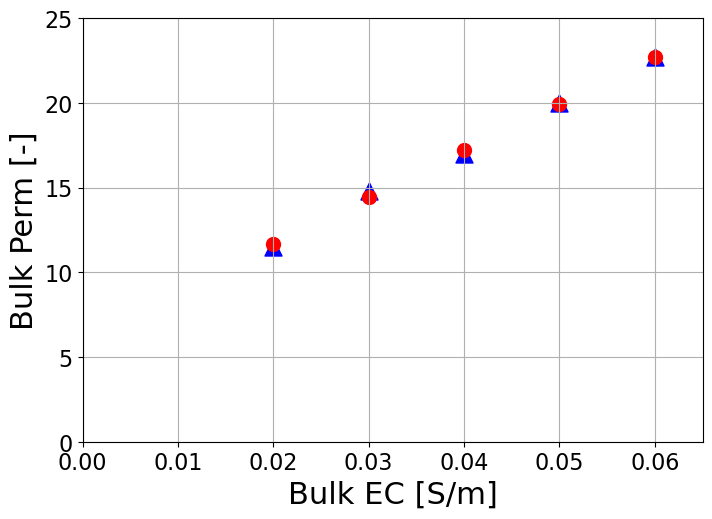

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample_O.df.bulk_ec, sample_O.df.bulk_perm, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sample_O.df.bulk_ec, 
           Hilhorst(sample_O.df.bulk_ec, sample_O.df.water_ec, sample_O.df.water_perm, sample_O.df.offset_perm), 
           color='red', alpha=1, s=100)

fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_ylim(0, 25)
ax.set_xlim(0, 65e-3)
ax.grid(True)
ax.set_ylabel('Bulk Perm [-]', fontsize = 22)
ax.set_xlabel('Bulk EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('sample_O')
plt.show()

ax.scatter(sample_O.df.bulk_ec, sample_O.df.bulk_perm, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sample_O.df.bulk_ec, 
           Hilhorst(sample_O.df.bulk_ec, sample_O.df.water_ec, sample_O.df.water_perm, sample_O.df.offset_perm), 
           color='red', alpha=1, s=100)

In [8]:
#print("################## Example DR_S ####################")     
                         #   0     1    2     3       4       5       6       7
sampleDR_S = Soil(bulk_ec =  [0, 8*10**-4, 3*10**-3, 6.5*10**-3, 1.3*10**-2, 1.8*10**-2],
                water = [0, 0.072,      0.144,    0.22,     0.29,       0.36      ],
                clay=5,
                bulk_density=1.48,
                instrument = 'TDR')

predict.Salinity(sampleDR_S)
print(sampleDR_S.df.salinity)
print(sampleDR_S.info.salinity)

print(sampleDR_S.df.water_ec)
print(sampleDR_S.info.water_ec)

0    0.00533
1    0.00533
2    0.00533
3    0.00533
4    0.00533
5    0.00533
Name: salinity, dtype: float64
0    Calculated using SenGood function in predict.Salinity
1    Calculated using SenGood function in predict.Salinity
2    Calculated using SenGood function in predict.Salinity
3    Calculated using SenGood function in predict.Salinity
4    Calculated using SenGood function in predict.Salinity
5    Calculated using SenGood function in predict.Salinity
Name: salinity, dtype: object
0    0.063443
1    0.063443
2    0.063443
3    0.063443
4    0.063443
5    0.063443
Name: water_ec, dtype: float64
0    nan--> Calculated by fitting (R2 = 1.0) Rhoades function in predict.water_ec.fitting_rhoades
1    nan--> Calculated by fitting (R2 = 1.0) Rhoades function in predict.water_ec.fitting_rhoades
2    nan--> Calculated by fitting (R2 = 1.0) Rhoades function in predict.water_ec.fitting_rhoades
3    nan--> Calculated by fitting (R2 = 1.0) Rhoades function in predict.water_ec.fitting_rhoades


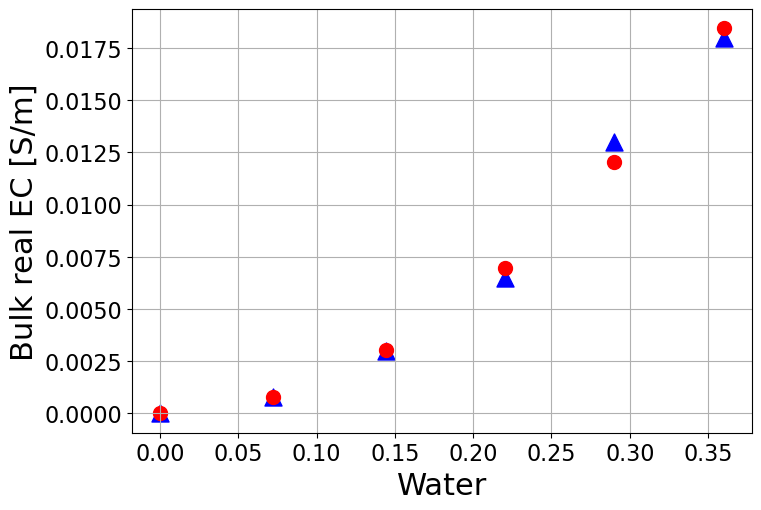

In [9]:
#sampleDR_S.info.to_excel('sampleDR_S_info.xlsx')
#sampleDR_S.df.to_excel('sampleDR_S_df.xlsx')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sampleDR_S.df.water, sampleDR_S.df.bulk_ec, marker = "^", color='blue', alpha=1, s=ss)
ax.scatter(sampleDR_S.df.water, Rhoades(sampleDR_S.df.water, sampleDR_S.df.water_ec, sampleDR_S.df.s_ec, sampleDR_S.E, sampleDR_S.F), color='red', alpha=1, s=100)

fig.set_figheight(5.5)
fig.set_figwidth(8)

#ax.set_ylim(0, 25)
#ax.set_xlim(0, 65e-3)
ax.grid(True)
ax.set_xlabel('Water', fontsize = 22)
ax.set_ylabel('Bulk real EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('ExDR_S')
plt.show()

In [24]:
ss = 150

sample5 = Soil( water = [0.3, 0.1, 0.15, 0.23, 0.02],
                bulk_density = 1.5,
                texture = 'Silt loam',
                instrument = 'GPR')


predict.BulkPerm(sample5) 

print('sample5', sample5)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(sample5.water, sample5.df.bulk_perm, marker='o', color='darkorange', alpha=0.8, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 0.35)
ax.set_ylim(0, 35)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_xlabel('Water content [-]', fontsize = 22) 
ax.set_ylabel('Bulk real permittivity [-]', fontsize = 22) 
ax.grid(True)  
#ax.legend(loc='upper right', fontsize = 20)


plt.savefig('Ex5')
plt.show()

array([18.563,  6.781,  9.328, 13.973,  3.357])

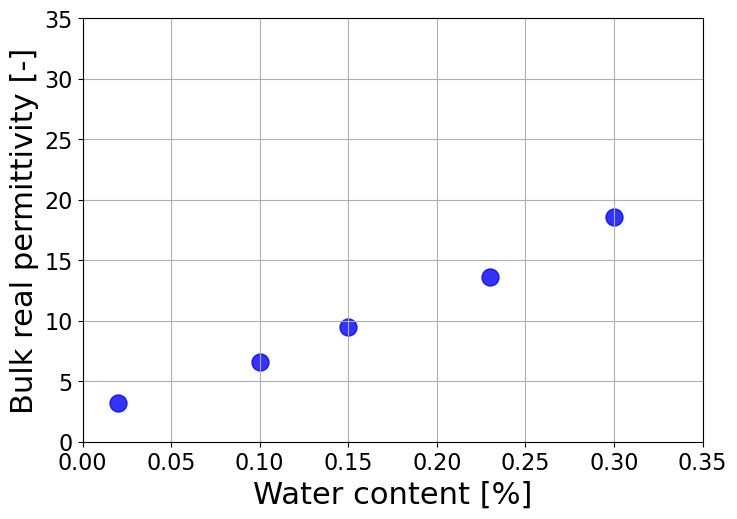

[nan nan nan nan nan]
0    80
1    80
2    80
3    80
4    80
Name: water_perm, dtype: int64


In [14]:
sample5b = Soil( water = [0.3, 0.1, 0.15, 0.23, 0.02],
                 bulk_density = [1.5, 1.35, 1.6, 1.33, 1.4],
                 temperature = 15+273.15,
                 texture = 'Silt loam',
                 instrument = 'GPR')

predict.BulkPerm(sample5b) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

s=150 
ax.scatter(sample1.water, sample1.df.bulk_perm, color='darkorange', alpha=0.8, s=ss)
ax.scatter(sample5b.water, sample5b.df.bulk_perm, color='blue', alpha=0.8, s=ss)

fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 0.35)
ax.set_ylim(0, 35)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 
ax.set_xlabel('Water content [%]', fontsize = 22) 
ax.set_ylabel('Bulk real permittivity [-]', fontsize = 22) 
ax.grid(True)  

plt.savefig('Ex5b')
plt.show()

print(sample5b.water_perm)
print(sample5b.df.water_perm)

Water perm changing freq


WaterFromEC
dc_freq
non_fitting


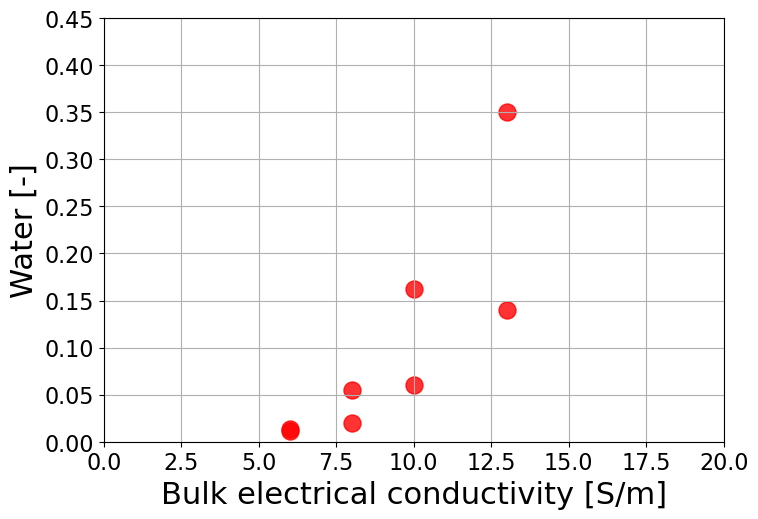

In [17]:
sample4 = Soil( bulk_perm = [6, 8, 10, 13, 6, 8, 10, 13],
                frequency_perm = [50e6, 50e6, 50e6, 50e6, 200e6, 200e6, 200e6, 200e6],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.Water(sample4) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample4.bulk_perm[0:4], sample4.df.water[0:4], color='red', alpha=0.8, s=ss)
ax.scatter(sample4.bulk_perm[4:], sample4.df.water[4:], color='red', alpha=0.8, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_xlim(0, 20)
ax.set_ylim(0, 0.45)
ax.grid(True)
ax.set_ylabel('Water [-]', fontsize = 22)
ax.set_xlabel('Bulk electrical conductivity [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 


plt.savefig('Ex4')
plt.show()


WaterFromEC
dc_freq
non_fitting


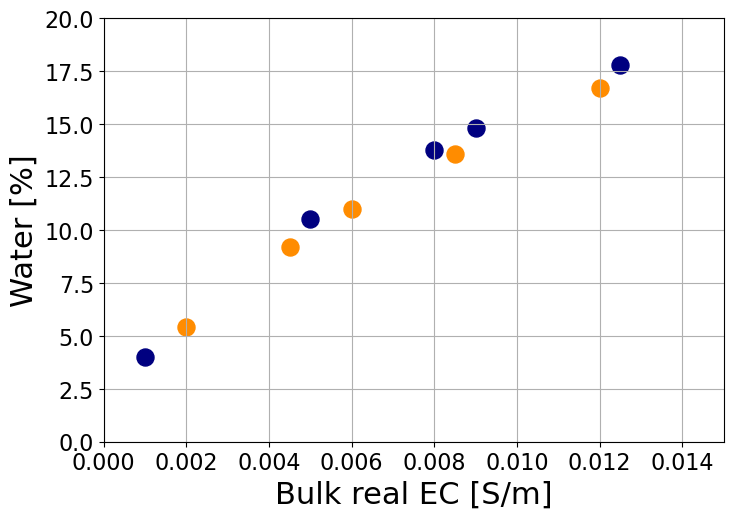

In [18]:
sample3 = Soil( bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 
                             0.0085, 0.012, 0.0045, 0.006, 0.002],
                frequency_ec = [80, 80, 80, 80, 80, 
                                  50e3, 50e3, 50e3, 50e3, 50e3],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.Water(sample3) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample3.bulk_ec[:5], sample3.df.water[:5]*100, color='navy', alpha=1, s=ss)
ax.scatter(sample3.bulk_ec[5:], sample3.df.water[5:]*100, color='darkorange', alpha=1, s=ss)
fig.set_figheight(5.5)
fig.set_figwidth(8)

ax.set_ylim(0, 20)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('Water [%]', fontsize = 22)
ax.set_xlabel('Bulk real EC [S/m]', fontsize = 22)
ax.tick_params(axis='y', labelsize=16) 
ax.tick_params(axis='x', labelsize=16) 

plt.savefig('Ex3')
plt.show()

In [19]:
sample1a = Soil( bulk_ec = [ 0.002, 0.002 ] ,
                frequency_ec = [ 80, 80, 50e3],
                water = [0.2],
                texture = 'Sand',
                bulk_density= 1.5,
                water_ec = 0.3)

predict.BulkEC(sample1a) 
sample1a.df.bulk_ec

0    0.002000
1    0.002000
2    0.016408
Name: bulk_ec, dtype: float64

In [20]:
sample1b = Soil( bulk_perm = [ 15, 15 ] ,
                frequency_perm = [ 50e6, 50e6, 50e8],
                texture = 'Sand',
                water = 0.1,
                bulk_density= 1.5,
                water_ec = 0.3)

predict.BulkPerm(sample1b) 
sample1b.df.bulk_perm

0    15.000
1    15.000
2     6.177
Name: bulk_perm, dtype: float64

In [21]:
print("################## Example1b ####################") 
                         #          0     1     2     3       4     5      6      7      8     9      10
sample1bWEC = Soil( bulk_ec=np.array(  [10,   15,   20,   25,     7,    1,     12,    22,    5,    20,    30   ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
            water_ec = np.array( [ 0.05, 0.06, 0.07, np.nan, 0.01, 0.1]))

water1b = predict.Water(sample1bWEC) #         [0.348 0.414 0.46    nan   0.444 0.058   nan   nan   nan   nan   nan] 
print("water1b", water1b) #         

sample1bWEC.info
#Despite several nans in the prediction of water, the info gives the same information about the modelling of states where there are nans and 
#results. How can I check why this is a nan? the info mentiones the function Fu. 
# So in the graph of the paper we follow that function predict.water.water_from_ec.non_fitting and check the needed arguments.

################## Example1b ####################
WaterFromEC
dc_freq
non_fitting
water1b [0.35  0.413 0.459   nan 0.442 0.065   nan   nan   nan   nan   nan]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
1,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
2,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
3,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
6,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
7,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,NaN,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
8,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given 

In [22]:
print("################## Example4 ####################")     
                         #                      0     1     2     3       4       5       6       7
sample4WEC = Soil(water =                      [0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07], 
                            bulk_ec=np.array(  [6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5 ])*1e-3, 
                            water_ec = 0.05)

water4 = predict.Water(sample4WEC) #                   [0.05  0.11  0.08  0.11    nan     nan     0.067   0.07 ]
print('water4', water4) #                     

sample4WEC.info
# Aca el estado 4 y 5 uestra dos modelados. Esto es pq el output del primero (fitting) es un nan. Entonces se llama 
#a Fu, donde solo uno puede ser resuelto. Entonces los resultados del df corresponden al ultimo modelado que el info menciona

################## Example4 ####################
WaterFromEC
dc_freq
water EC fitting
non_fitting
water4 [0.05  0.11  0.08  0.11    nan   nan 0.067 0.07 ]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
1,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
2,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
3,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.013]",NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default
7,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,NaN,NaN,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Set as 0Hz (direct current) by default


In [23]:
print("################## Example5 ####################")
                         #                     0     1     2     3     4     5     6      7    8     9      10
sample5WEC = Soil( bulk_ec=np.array([          10,   15,   20,   25,   7,    1,    12,    20,  5,    20,    22 ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            water_ec = 0.01,
                      frequency_ec = 500)

water5 = predict.Water(sample5WEC) #           [0.557 0.65  0.65  0.65  0.421 0.074 0.639 0.65  0.32  0.65  0.65 ]
print("water5", water5) #                      [0.566 0.65  0.65  0.65  0.421 0.15  0.639 0.65  0.316 0.65  0.65 ] 16/8 !?
#                                   
sample5WEC.info

################## Example5 ####################
WaterFromEC
dc_freq
non_fitting
water5 [0.566 0.65  0.65  0.65  0.421 0.15  0.639 0.65  0.316 0.65  0.65 ]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,nan--> Calculated using

In [24]:
print("################## Example6 ####################")     
                         #                      0     1     2     3     4     5     6     7     8     9     10
sample6WEC = Soil(water =          [            0.20, 0.30, 0.35                                                 ], 
                            bulk_ec=np.array([  10,   15,   20,   8.5,  8,    1,    12,   22,   5,    20,   30   ])*1e-3, 
                            bulk_density=1.7,
                            clay = 40,
                            water_ec=0.4,
                            frequency_ec=5e3)

water6 = predict.Water(sample6WEC) #                   [0.2   0.3   0.35  0.162 0.148 0.005 0.241 0.374 0.033 0.354 0.131]
print("water6", water6) #                         
print("sample6WEC.Lw", sample6WEC.Lw) #                         

sample6WEC.info

################## Example6 ####################
WaterFromEC
dc_freq
water EC fitting
non_fitting
water6 [0.2   0.3   0.35  0.162 0.148 0.005 0.241 0.374 0.033 0.354 0.131]
sample6WEC.Lw 0.2008264330151126


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values given by the user,Values given by the user,Set as 2.65 by default,NaN,NaN,...,NaN,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
8,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.004, 0.023]",NaN,NaN,NaN,Values

In [25]:
print("################## Example7 ####################")
                        #                      0     1     2     3       4       5       6       7     8       9
sample7WEC = Soil(water =          [           0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07, np.nan, np.nan], 
                            bulk_ec =np.array([6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5,  8.5,    8.5 ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            solid_perm = 5,
                            water_ec = 0.05,
                    frequency_ec = [           50e1, 50e2, 50e2, 200e2,  200e2,  200e2,  50e2,   50e1, 50e1,   200e2] )

# bulk_ec_dc [0.0056  0.01014 0.00826     nan 0.00078     nan 0.00732 0.00798 0.00798  0.0076 ]

water7 = predict.Water(sample7WEC)  #                
print('water7', water7) #                     [0.05  0.11  0.08  0.11    0.071   nan     0.028   0.07  0.028   0.028]
#                                             [0.05  0.11  0.08  0.11    0.071   nan     0.067   0.07  0.073   0.073]
sample7WEC.info

################## Example7 ####################
WaterFromEC
dc_freq
water EC fitting
non_fitting
water7 [0.05  0.11  0.08  0.11  0.071   nan 0.028 0.07  0.028 0.028]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.003, 0.012]",NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values

In [26]:
print("################## Example7b ####################")
                        #                       0     1     2     3       4       5       6       7     8       9
sample7bWEC = Soil(water =                     [0.05, 0.11, 0.08, 0.11,   np.nan, np.nan, np.nan, 0.07, np.nan, np.nan], 
                            bulk_ec=np.array([  6,    11,   9,    np.nan, 1,      np.nan, 8,      8.5,  8.5,    8.5   ])*1e-3, 
                            bulk_density=1.7,
                            texture = 'Sand',
                            solid_perm = 5,
                            water_ec = 0.05,
                    frequency_ec =             [50,   5,   50,    200e2,  200e2,  200e2,  50e2,   50e1, 50,     20    ])

water7b = predict.Water(sample7bWEC)                  
print('water7b', water7b) #                    [0.05  0.11  0.08  0.11    0.056   nan     0.061   0.07  0.075   0.075]
                             #                 [0.05  0.11  0.08  0.11    0.071   nan     0.      0.07  0.073   0.073]
                             #                 [0.05  0.11  0.08  0.11    0.071   nan     0.067   0.07  0.073   0.073]
sample7bWEC.info

################## Example7b ####################
WaterFromEC
dc_freq
water EC fitting
non_fitting
water7b [0.05  0.11  0.08  0.11  0.071   nan 0.063 0.07  0.072 0.073]


,temperature,water,salinity,sand,silt,clay,bulk_density,particle_density,CEC,orgm,...,solid_perm,offset_perm,bulk_ec,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
1,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
2,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
3,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
4,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
5,Set as 298.15 K by default,nan--> Calculated using Fu function (reported R2=0.98) in predict.water.water_from_ec.non_fitting,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,NaN,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
6,Set as 298.15 K by default,"nan--> Calculated by fitting (R2=1.0) WunderlichEC function in predict.water.water_from_ec.fitting, for soil.bulk_ec values between: [0.003, 0.014]",NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
7,Set as 298.15 K by default,Values given by the user,NaN,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Fraction calculated using soil.texture,Values given by the user,Set as 2.65 by default,NaN,NaN,...,Values given by the user,NaN,Values given by the user--> EM frequency shift from actual to zero Hz using LongmireSmithEC function in predict.bulk_ec.non_dc_to_dc,Values given by the user,Set as zero by default,NaN,NaN,NaN,NaN,Values given by the user
8,Set as 298.15 K by defa

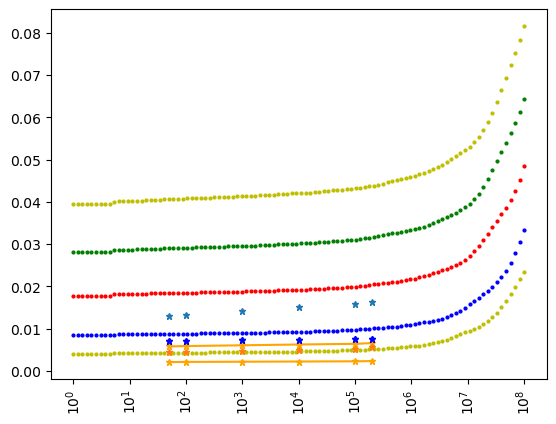

In [27]:
sample11g = Soil(water = [0.1], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_ec=np.logspace(0, 8, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkEC(sample11g)
LS2 = predict.BulkEC(sample12g)
LS3 = predict.BulkEC(sample13g)
LS4 = predict.BulkEC(sample14g)
LS5 = predict.BulkEC(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(0, 8, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(0, 8, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(0, 8, 9), rotation='vertical')  # Set label locations.

plt.show()

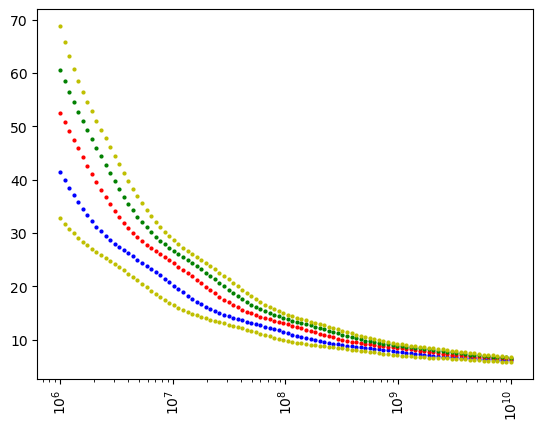

In [28]:
sample11g = Soil(water = [0.1], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample12g = Soil(water = [0.2], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample13g = Soil(water = [0.3], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample14g = Soil(water = [0.4], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)
sample15g = Soil(water = [0.05], frequency_perm=np.logspace(6, 10, 100), temperature=25.+273.15, sand = 20, silt = 60, water_ec = 0.05, bulk_density=1.5)

LS1 = predict.BulkPerm(sample11g)
LS2 = predict.BulkPerm(sample12g)
LS3 = predict.BulkPerm(sample13g)
LS4 = predict.BulkPerm(sample14g)
LS5 = predict.BulkPerm(sample15g)

#LS1 = LongmireSmithEC([0.01], np.logspace(0, 9, 100) )
#LS2 = LongmireSmithEC([0.02], np.logspace(0, 9, 100) )
#LS3 = LongmireSmithEC([0.03], np.logspace(0, 9, 100) )
#LS4 = LongmireSmithEC([0.04], np.logspace(0, 9, 100) )
#LS5 = LongmireSmithEC([0.05], np.logspace(0, 9, 100) )

plt.semilogx(np.logspace(6, 10, 100), LS1, 'bo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS2, 'ro', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS3, 'go', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS4, 'yo', markersize=2)
plt.semilogx(np.logspace(6, 10, 100), LS5, 'yo', markersize=2)

#plt.semilogx(np.logspace(0, 9, 100), LS5, 'o',  markersize=2)
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/77, 1/75, 1/70, 1/66, 1/63, 1/61], '*', markersize=5) #Fig 3a zhou15 clay Loam
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3a zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/173, 1/170, 1/165, 1/160, 1/156, 1/152], color= 'orange', marker='*', markersize=5)#Fig 3a zhou15 sandy

#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/142, 1/140, 1/138, 1/136, 1/134, 1/132], 'b*', markersize=5)#Fig 3b zhou15 silty sand
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/480, 1/470, 1/460, 1/450, 1/440, 1/430], color= 'orange', marker='*', markersize=5)#Fig 3b zhou15 sandy
#plt.plot([50, 100, 1000, 10000, 100000, 200000], [1/225, 1/220, 1/210, 1/200, 1/190, 1/180], '*', markersize=5) #Fig 3b zhou15 clay Loam

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.logspace(6, 10, 5), rotation='vertical')  # Set label locations.

plt.show()